## Down-Sampling -  #700055807

In [1]:
#importing all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score,fbeta_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
#importing white wine data set (UCI https://archive.ics.uci.edu/ml/datasets/wine+quality)

wine_df = pd.read_csv('data/winequality-white.csv', sep=';')

data = wine_df.copy()

In [4]:
#Creating the catigorical target, less than 8 as 0 and more than 8 as 1

data['type'] = np.where(data['quality'] < 8, 'bad', 'good')


In [5]:
# using the enconder to code 0,1 for bad and good respectvily 

le = LabelEncoder()
data['target'] = le.fit_transform(data['type'])

## Splitting and Resampling for train data only

In [6]:
#splitting data for y_test, and X_test only

X = data.iloc[:,:-3]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [7]:
#creating down sampling for X_train and y_train

class_0_len = X_train[y_train == 0].shape[0]
class_0_len

3536

In [8]:
class_1_len = X_train[y_train == 1].shape[0]
class_1_len

137

In [9]:
#using resample to down sample for the majority class

from sklearn.utils import resample

class_0_resampled = resample(X_train[y_train == 0], n_samples = class_1_len, replace=False)
class_0_resampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
174,7.5,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2
2057,6.7,0.310,0.31,4.9,0.031,20.0,151.0,0.99260,3.36,0.82,12.0
939,7.7,0.240,0.29,15.3,0.044,39.0,194.0,0.99820,3.06,0.47,9.6
4699,6.8,0.300,0.33,12.8,0.041,60.0,168.0,0.99659,3.10,0.56,9.8
1951,9.9,1.005,0.46,1.4,0.046,34.0,185.0,0.99660,3.02,0.49,10.2


In [10]:
class_0_resampled.shape

(137, 11)

In [11]:
class_1_ready = X_train[y_train == 1]

In [12]:
class_0_resampled['target'] = y_train[y_train==0]

In [13]:
class_1_ready['target'] = y_train[y_train == 1]

<ipython-input-13-20e515527528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_1_ready['target'] = y_train[y_train == 1]


In [14]:
#concat both down samples for splitting
down_and_balanced = pd.concat([class_1_ready, class_0_resampled], axis=0)
down_and_balanced.shape

(274, 12)

In [15]:
x_train_down_balanced = np.array(down_and_balanced.iloc[:,:-1])
x_train_down_balanced

array([[ 8.1 ,  0.17,  0.44, ...,  3.28,  0.75,  8.8 ],
       [ 7.3 ,  0.39,  0.37, ...,  3.39,  0.48, 12.7 ],
       [ 6.7 ,  0.24,  0.3 , ...,  3.04,  0.59, 11.3 ],
       ...,
       [ 6.4 ,  0.23,  0.27, ...,  3.03,  0.63, 10.9 ],
       [ 6.  ,  0.32,  0.46, ...,  3.24,  0.49,  9.6 ],
       [ 7.5 ,  0.18,  0.72, ...,  3.03,  0.46,  8.9 ]])

In [16]:
y_train_down_balanced = np.array(down_and_balanced.iloc[:,-1])
y_train_down_balanced

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
# running the classifiers for the down sampling

model_scores = {}
model_roc_scores = {}
model_fbeta_score = {}
precision_scores = {}

DT_re_down = DecisionTreeClassifier()
log_re_down = LogisticRegression()
RF_down = RandomForestClassifier()

for model in [DT_re_down, log_re_down, RF_down]:
    model.fit(x_train_down_balanced, y_train_down_balanced)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    model_scores[model] = score
    
    y_pred_proba = model.predict_proba(X_test)
    roc = roc_auc_score(y_test, y_pred_proba[:,1])
    model_roc_scores[model] = roc
    
    y_pred_proba = model.predict_proba(X_test)
    fb_score = fbeta_score(y_test, y_pred, beta=0.5)
    model_fbeta_score[model] = fb_score
    
    y_pred = model.predict(X_test)
    p_score = precision_score(y_test, y_pred)
    precision_scores[model] = p_score
    
    
model_scores
model_roc_scores
model_fbeta_score
precision_scores

#creating the df for comparing the classifiers

roc_df = pd.DataFrame(list(model_roc_scores.items()),columns = ['Model','Roc Auc Score']) 
scores_df = pd.DataFrame(list(model_scores.items()),columns = ['Model1','Accuracy Score'])
precision_scores_df = pd.DataFrame(list(precision_scores.items()), columns=['Model3','Precision Score'])
fbeta_scores_df = pd.DataFrame(list(model_fbeta_score.items()), columns=['Model2','F_beta Score'])

total_scores_df = pd.concat([roc_df,scores_df ,precision_scores_df, fbeta_scores_df], axis=1)
total_scores_df.drop(['Model1', 'Model2', 'Model3'], axis=1, inplace=True)
total_scores_df.index.name = 'TOMEK Sampling'
total_scores_df = total_scores_df.round(2)
total_scores_df.index = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier']
total_scores_df

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Roc Auc Score,Accuracy Score,Precision Score,F_beta Score
DecisionTreeClassifier,DecisionTreeClassifier(),0.68,0.67,0.07,0.09
LogisticRegression,LogisticRegression(),0.79,0.66,0.08,0.09
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",0.89,0.73,0.10,0.13


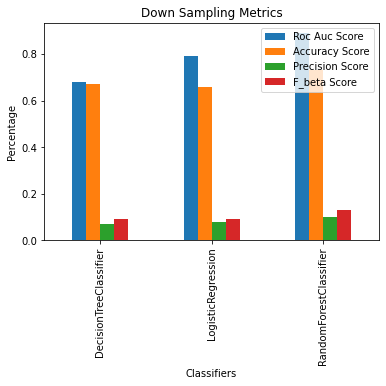

In [18]:
#plotting the comparison - down sampling

total_scores_df.plot(kind='bar')
plt.title('Down Sampling Metrics')
plt.ylabel('Percentage')
plt.xlabel('Classifiers')

plt.show()

In [19]:
#final table for comparison
total_scores_df.drop('Model', axis=1)

,Roc Auc Score,Accuracy Score,Precision Score,F_beta Score
DecisionTreeClassifier,0.68,0.67,0.07,0.09
LogisticRegression,0.79,0.66,0.08,0.09
RandomForestClassifier,0.89,0.73,0.10,0.13


## Running the classifiers for DT, RF, Log - Down Sampling

In [20]:
DT_re_down = DecisionTreeClassifier()
DT_re_down.fit(x_train_down_balanced, y_train_down_balanced)
y_pred_DT_down = DT_re_down.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred_DT_down)

0.6653061224489796

In [22]:
print(classification_report(y_test,y_pred_DT_down))


              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1182
           1       0.07      0.70      0.13        43

    accuracy                           0.67      1225
   macro avg       0.53      0.68      0.46      1225
weighted avg       0.95      0.67      0.77      1225



No Skill: ROC AUC=0.500
DT Down Sampling: ROC AUC=0.681


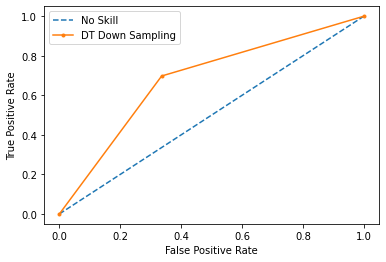

In [23]:
#AUC for DT

ns_probs = [0 for _ in range(len(y_test))]
y_pred_DT_re_proba = DT_re_down.predict_proba(X_test)
DTre_probs = y_pred_DT_re_proba[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
DTre_auc = roc_auc_score(y_test, DTre_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DT Down Sampling: ROC AUC=%.3f' % (DTre_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
DTre_fpr, DTre_tpr, _ = roc_curve(y_test, DTre_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(DTre_fpr, DTre_tpr, marker='.', label='DT Down Sampling')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [143]:
RF_down = RandomForestClassifier()
RF_down.fit(x_train_down_balanced, y_train_down_balanced)
y_pred_RF_down = RF_down.predict(X_test)
accuracy_score(y_test, y_pred_RF_down)

0.7436734693877551

In [154]:
print(classification_report(y_test,y_pred_RF_down))
print(fbeta_score(y_test, y_pred_RF_down, beta=0.5))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1182
           1       0.10      0.84      0.19        43

    accuracy                           0.74      1225
   macro avg       0.55      0.79      0.52      1225
weighted avg       0.96      0.74      0.82      1225

0.12720848056537104


No Skill: ROC AUC=0.500
RF Down Sampling: ROC AUC=0.892


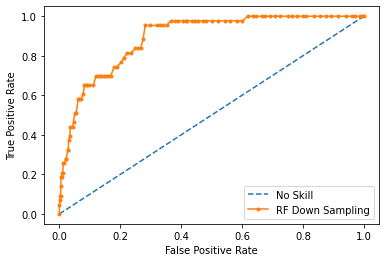

In [145]:
ns_probs = [0 for _ in range(len(y_test))]
y_pred_RF_down_proba = RF_down.predict_proba(X_test)
RFd_probs = y_pred_RF_down_proba[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
RFd_auc = roc_auc_score(y_test, RFd_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF Down Sampling: ROC AUC=%.3f' % (RFd_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RDd_fpr, RFd_tpr, _ = roc_curve(y_test, RFd_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(RDd_fpr, RFd_tpr, marker='.', label='RF Down Sampling')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [136]:
log_re_down = LogisticRegression()
log_re_down.fit(x_train_down_balanced, y_train_down_balanced)
y_pred_log_down = log_re_down.predict(X_test)
accuracy_score(y_test, y_pred_log_down)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6816326530612244

In [137]:
print(classification_report(y_test,y_pred_log_down))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1182
           1       0.08      0.77      0.14        43

    accuracy                           0.68      1225
   macro avg       0.53      0.72      0.47      1225
weighted avg       0.96      0.68      0.78      1225



No Skill: ROC AUC=0.500
Logistics Down Sampling: ROC AUC=0.813


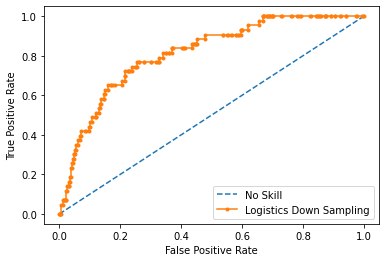

In [146]:
#AUC for logistic

ns_probs = [0 for _ in range(len(y_test))]
y_pred_log_down_proba = log_re_down.predict_proba(X_test)
log_d_probs = y_pred_log_down_proba[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
log_d_auc = roc_auc_score(y_test, log_d_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistics Down Sampling: ROC AUC=%.3f' % (log_d_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logd_fpr, logd_tpr, _ = roc_curve(y_test, log_d_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(logd_fpr, logd_tpr, marker='.', label='Logistics Down Sampling')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

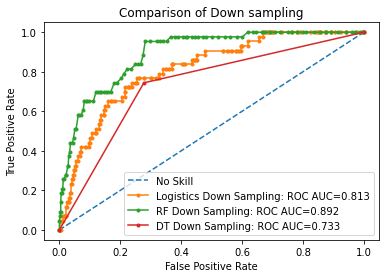

In [152]:
#AUC for all

ns_probs = [0 for _ in range(len(y_test))]
y_pred_log_down_proba = log_re_down.predict_proba(X_test)
log_d_probs = y_pred_log_down_proba[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
log_d_auc = roc_auc_score(y_test, log_d_probs)
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
#print('Logistics Down Sampling: ROC AUC=%.3f' % (log_d_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logd_fpr, logd_tpr, _ = roc_curve(y_test, log_d_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(logd_fpr, logd_tpr, marker='.', label='Logistics Down Sampling: ROC AUC=%.3f' % (log_d_auc))
plt.plot(RDd_fpr, RFd_tpr, marker='.', label='RF Down Sampling: ROC AUC=%.3f' % (RFd_auc))
plt.plot(DTre_fpr, DTre_tpr, marker='.', label='DT Down Sampling: ROC AUC=%.3f' % (DTre_auc))

# axis labels
plt.title('Comparison of Down sampling')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()